# LMGVIP- STOCK MARKET PREDICTION AND FORECASTING USING LSTM

## Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

## Data Exploration 

In [3]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [6]:
df.shape

(2035, 8)

In [7]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

## Data Visualization

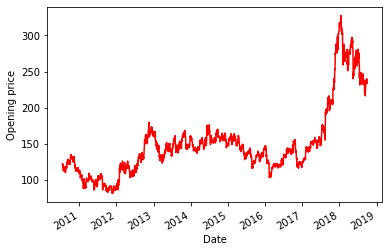

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
plt.plot(df['Date'],df['Open'],color = 'red')
plt.gcf().autofmt_xdate()
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.show()

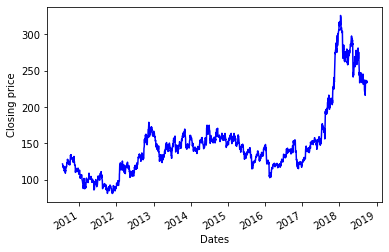

In [9]:
plt.plot(df['Date'],df['Close'],color = 'blue')
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel('Closing price')
plt.show()

## Creating Training Dataset 

In [10]:
training_dataset = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
train_stock = training_dataset.iloc[:,1:2].values

In [11]:
train_stock

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

## Scaling the Data

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [14]:
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [15]:
scaled_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [16]:
len(scaled_data)

2035

In [17]:
prediction_days = 65

## Creating Data Structure

In [18]:
X_train = []
y_train = []

In [19]:
for x in range(prediction_days,len(scaled_data)):
    X_train.append(scaled_data[x-prediction_days:x,0])
    y_train.append(scaled_data[x,0])
X_train = np.array(X_train)
y_train = np.array(y_train)

In [20]:
X_train

array([[0.62418301, 0.62214052, 0.62622549, ..., 0.74754902, 0.75428922,
        0.76143791],
       [0.62214052, 0.62622549, 0.63378268, ..., 0.75428922, 0.76143791,
        0.74979575],
       [0.62622549, 0.63378268, 0.62234477, ..., 0.76143791, 0.74979575,
        0.73999183],
       ...,
       [0.19403595, 0.19444444, 0.20200163, ..., 0.15236928, 0.15400327,
        0.14971405],
       [0.19444444, 0.20200163, 0.19771242, ..., 0.15400327, 0.14971405,
        0.1621732 ],
       [0.20200163, 0.19771242, 0.19934641, ..., 0.14971405, 0.1621732 ,
        0.16319444]])

In [21]:
y_train

array([0.74979575, 0.73999183, 0.72406046, ..., 0.1621732 , 0.16319444,
       0.16584967])

In [22]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [23]:
X_train

array([[[0.62418301],
        [0.62214052],
        [0.62622549],
        ...,
        [0.74754902],
        [0.75428922],
        [0.76143791]],

       [[0.62214052],
        [0.62622549],
        [0.63378268],
        ...,
        [0.75428922],
        [0.76143791],
        [0.74979575]],

       [[0.62622549],
        [0.63378268],
        [0.62234477],
        ...,
        [0.76143791],
        [0.74979575],
        [0.73999183]],

       ...,

       [[0.19403595],
        [0.19444444],
        [0.20200163],
        ...,
        [0.15236928],
        [0.15400327],
        [0.14971405]],

       [[0.19444444],
        [0.20200163],
        [0.19771242],
        ...,
        [0.15400327],
        [0.14971405],
        [0.1621732 ]],

       [[0.20200163],
        [0.19771242],
        [0.19934641],
        ...,
        [0.14971405],
        [0.1621732 ],
        [0.16319444]]])

In [24]:
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [25]:
model = Sequential()

In [26]:
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50,return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dense(units = 1))

In [27]:
model.compile(optimizer='rmsprop',loss='mean_squared_error')

In [28]:
model.fit(X_train,y_train,epochs = 30,batch_size = 35)

Epoch 1/30
57/57 [==============================] - 11s 63ms/step - loss: 0.0085
Epoch 2/30
57/57 [==============================] - 4s 62ms/step - loss: 0.0034
Epoch 3/30
57/57 [==============================] - 4s 63ms/step - loss: 0.0025
Epoch 4/30
57/57 [==============================] - 4s 63ms/step - loss: 0.0021
Epoch 5/30
57/57 [==============================] - 4s 65ms/step - loss: 0.0023
Epoch 6/30
57/57 [==============================] - 4s 65ms/step - loss: 0.0017
Epoch 7/30
57/57 [==============================] - 4s 64ms/step - loss: 0.0016
Epoch 8/30
57/57 [==============================] - 4s 69ms/step - loss: 0.0014
Epoch 9/30
57/57 [==============================] - 5s 84ms/step - loss: 0.0013
Epoch 10/30
57/57 [==============================] - 4s 78ms/step - loss: 0.0014
Epoch 11/30
57/57 [==============================] - 4s 78ms/step - loss: 0.0013
Epoch 12/30
57/57 [==============================] - 4s 70ms/step - loss: 0.0011
Epoch 13/30
57/57 [=================

## Creating test data set

In [29]:
test_set = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
real_stock = test_set.iloc[:,1:2].values

In [30]:
real_stock

array([[234.05],
       [234.55],
       [240.  ],
       ...,
       [121.8 ],
       [120.3 ],
       [122.1 ]])

In [31]:
total_dataset = pd.concat((training_dataset['Open'],test_set['Open']),axis = 1)

In [32]:
total_dataset.head()

,Open,Open
0,234.05,234.05
1,234.55,234.55
2,240.00,240.00
3,233.30,233.30
4,233.55,233.55


In [33]:
inputs = total_dataset[len(total_dataset) - len(test_set) - prediction_days:].values


In [34]:
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)


In [35]:
inputs

array([[0.19730392],
       [0.19730392],
       [0.2064951 ],
       [0.2064951 ],
       [0.20077614],
       [0.20077614],
       [0.22017974],
       [0.22017974],
       [0.21772876],
       [0.21772876],
       [0.20812908],
       [0.20812908],
       [0.21875   ],
       [0.21875   ],
       [0.21875   ],
       [0.21875   ],
       [0.21977124],
       [0.21977124],
       [0.20077614],
       [0.20077614],
       [0.19219771],
       [0.19219771],
       [0.17994281],
       [0.17994281],
       [0.17749183],
       [0.17749183],
       [0.16482843],
       [0.16482843],
       [0.1689134 ],
       [0.1689134 ],
       [0.17299837],
       [0.17299837],
       [0.17830882],
       [0.17830882],
       [0.18545752],
       [0.18545752],
       [0.17361111],
       [0.17361111],
       [0.16605392],
       [0.16605392],
       [0.17177288],
       [0.17177288],
       [0.17810458],
       [0.17810458],
       [0.16973039],
       [0.16973039],
       [0.17095588],
       [0.170

In [36]:
len(inputs)

130

In [37]:
X_test=[]

In [38]:
for x in range(prediction_days,len(inputs)):
    X_test.append(inputs[x-prediction_days:x,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, newshape = (X_test.shape[0],X_test.shape[1], 1))  
                        
    


## Predicting the stcok prices 

In [39]:
predicted_stock_price = model.predict(X_test)

3/3 [==============================] - 4s 15ms/step


In [40]:
predicted_stock_price

array([[0.18151739],
       [0.18052533],
       [0.18236014],
       [0.18493351],
       [0.18337998],
       [0.18004012],
       [0.17116813],
       [0.162375  ],
       [0.15934756],
       [0.16034299],
       [0.16278258],
       [0.1647479 ],
       [0.16459438],
       [0.16336839],
       [0.15928346],
       [0.15507206],
       [0.15561652],
       [0.15852281],
       [0.15545991],
       [0.14997591],
       [0.14299014],
       [0.13766226],
       [0.13246919],
       [0.12879339],
       [0.1272442 ],
       [0.12710297],
       [0.1297198 ],
       [0.13274576],
       [0.13990346],
       [0.14687324],
       [0.14773525],
       [0.14512363],
       [0.14166155],
       [0.13926318],
       [0.13931918],
       [0.14060745],
       [0.14080802],
       [0.14024241],
       [0.138386  ],
       [0.1364825 ],
       [0.13798432],
       [0.14079192],
       [0.14676207],
       [0.15233913],
       [0.15752207],
       [0.1608847 ],
       [0.16201085],
       [0.161

In [41]:
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

In [42]:
predicted_stock_price

array([[125.38545 ],
       [125.14259 ],
       [125.59176 ],
       [126.22172 ],
       [125.84141 ],
       [125.02382 ],
       [122.85196 ],
       [120.6994  ],
       [119.95828 ],
       [120.201965],
       [120.79918 ],
       [121.28028 ],
       [121.24271 ],
       [120.94258 ],
       [119.94259 ],
       [118.911644],
       [119.04492 ],
       [119.756386],
       [119.006584],
       [117.6641  ],
       [115.95399 ],
       [114.64972 ],
       [113.378456],
       [112.47862 ],
       [112.09938 ],
       [112.064804],
       [112.70541 ],
       [113.44616 ],
       [115.198364],
       [116.90457 ],
       [117.115585],
       [116.476265],
       [115.628746],
       [115.041626],
       [115.055336],
       [115.370705],
       [115.4198  ],
       [115.28134 ],
       [114.82689 ],
       [114.360916],
       [114.72856 ],
       [115.41586 ],
       [116.87736 ],
       [118.24262 ],
       [119.5114  ],
       [120.33457 ],
       [120.61025 ],
       [120.5

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


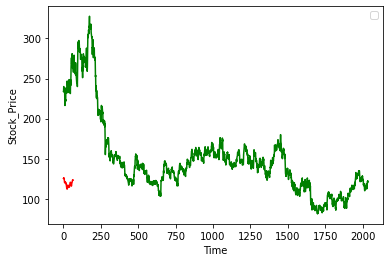

In [43]:
plt.plot(real_stock, color = 'green')
plt.plot(predicted_stock_price, color = 'red')
plt.xlabel('Time')
plt.ylabel('Stock_Price')
plt.legend()
plt.show()